In [15]:
#dependencies of simrakit
!pip install gitpython geopandas geopy matplotlib ipyleaflet osmium shapely

#relevant dependencies
!pip install scipy pandas numpy

In [16]:
#needed import for loading the files as a dataframe
import simrakit.RideParser

#load dataframe from file
ride = simrakit.RideParser.Ride.from_file("test-data/trip_alt_lietzow_spandau.csv")
#ride = simrakit.RideParser.Ride.from_file("test-data/thesis/prenzlauer-bike-lane-medium-bad.csv")

#by using dataframes and simrakit, the timeStamp is the index for the x y z data points
#and thus not explicity selected
df = ride.ride_df[["X", "Y", "Z"]]
df

,X,Y,Z
timeStamp,,,
2022-05-24 15:58:07.000,0.000000,0.000000,0.000000
2022-05-24 15:58:08.035,-1.097508,-2.094245,-9.491243
2022-05-24 15:58:08.135,-1.323353,-2.147055,-9.501626
2022-05-24 15:58:08.235,-1.438818,-2.189721,-9.502350
2022-05-24 15:58:08.335,-1.488410,-2.220842,-9.489941
...,...,...,...
2022-05-24 16:45:11.929,-0.954510,-2.112542,-9.730420
2022-05-24 16:45:12.029,-1.177217,-1.729713,-9.851638
2022-05-24 16:45:12.129,-1.580598,-1.321786,-10.046793


In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.stattools import acf
import numpy as np
import pandas as pd

#main decomposition function
#takes a dataframe and calculates the decompostion for every axis
#
def decompose(df):
    result_list = {}
    for direction in ["X", "Y", "Z"]:
        
        dp = df[direction]
        #we need to find the lag with highest correlation to use in sesonal decompostion
        #in my understandig the lag (with highest corr) will define the period
        all_auto = acf(dp, nlags=len(dp)//2, alpha=None, fft=True)
        #ac[2:] for cutting lag 0 with r-value of 1
        #and lag 1 as it cannot be used with seasonel_decompose effectively
        max_corr_lag = np.abs(all_auto[2:]).argmax() + 2
        
        #as a alternative we need to find a fix value?!
        
        result_add = seasonal_decompose(dp, model='additive', extrapolate_trend='freq', period=max_corr_lag)
        result_add.plot()
        result_list[direction] = {"observed": result_add.observed, 
                                  "seasonal": result_add.seasonal,
                                  "trend": result_add.trend,
                                  "resid": result_add.resid}
    return result_list
    

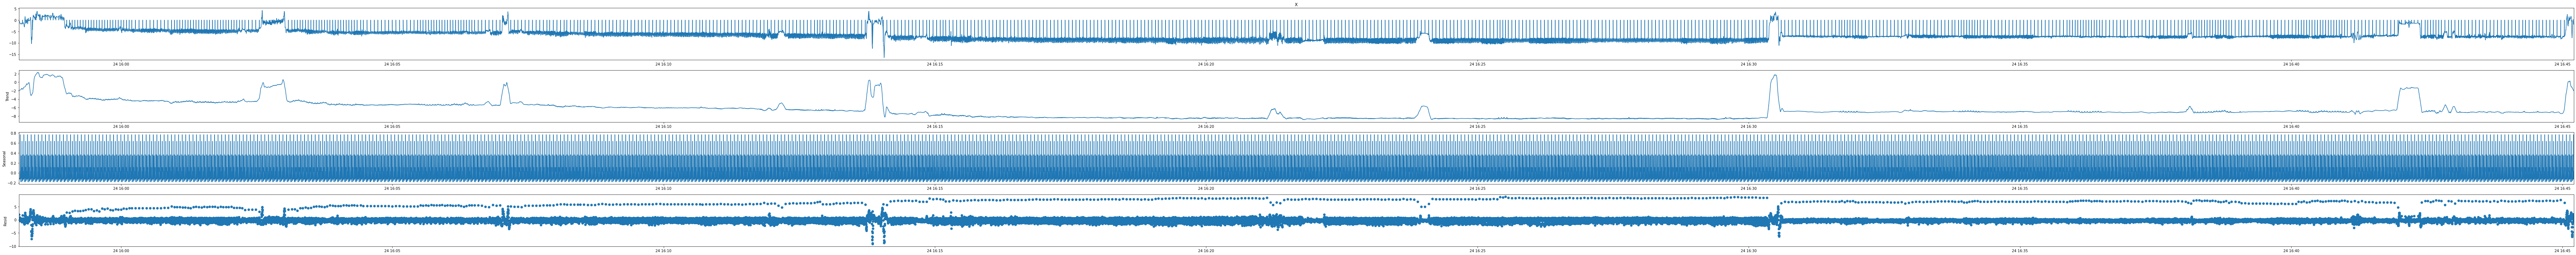

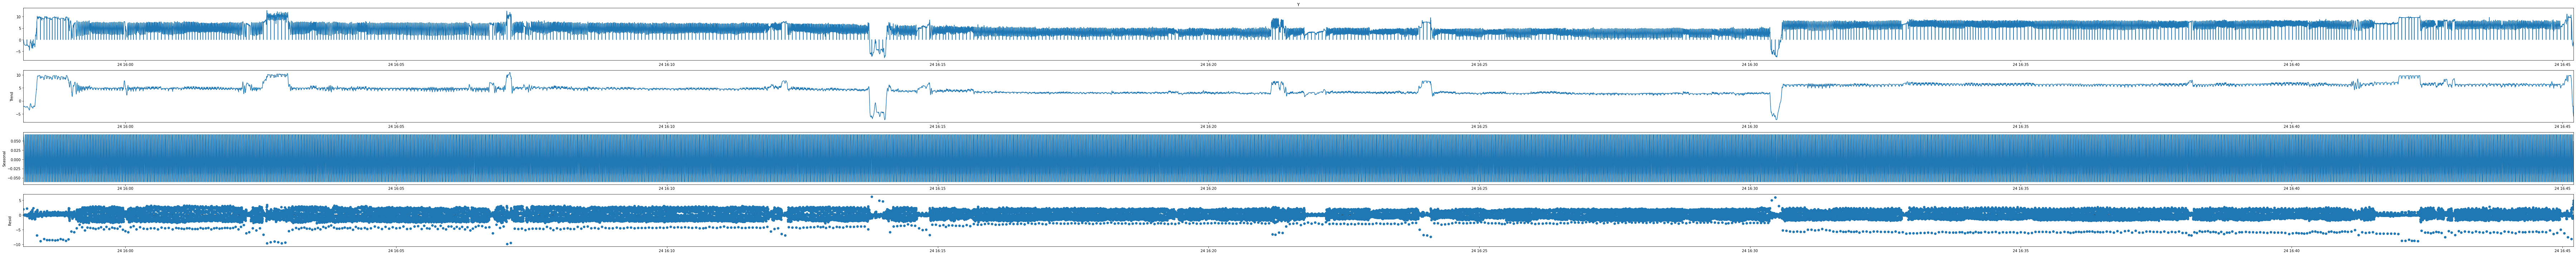

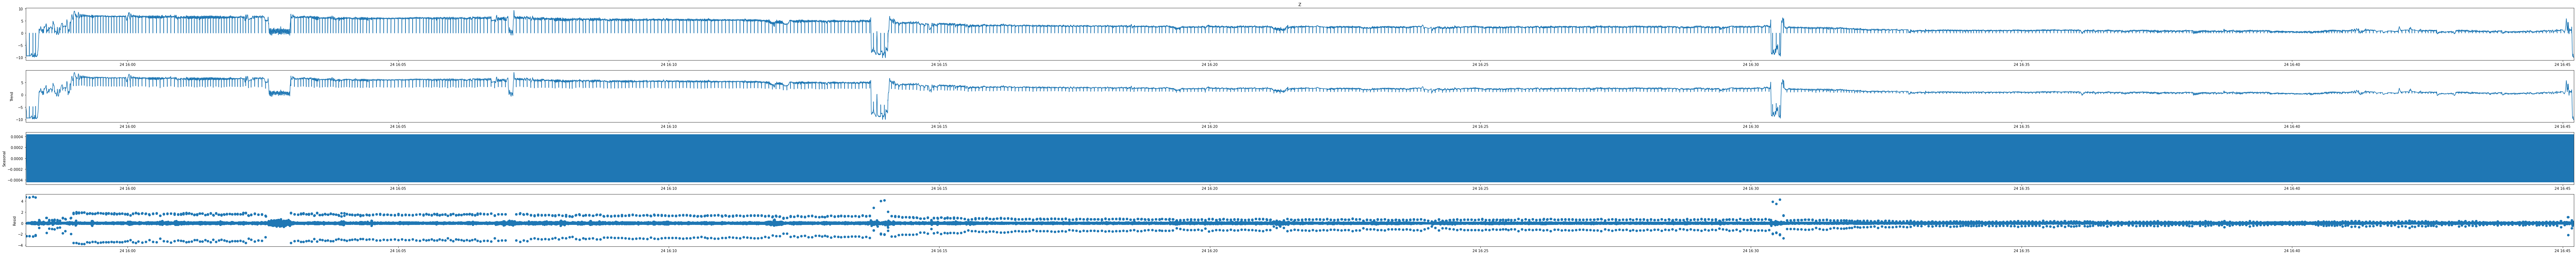

In [39]:
result = decompose(df)